#Clustering

### **ANGGOTA KELOMPOK :**
**1. M. Zhafir Zaydan (21.11.3913)**               
**2. Vika Nur Safitri (21.11.3918)**                
**3. Luthfa Sobrian Pramasta (21.11.3943)**              
**4. Ahmad Julian Rifki (21.11.3964)**

In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=869ef0a7cba1256d77f29f31258ee24dcb3b595ffd58626cd7b82841227160ed
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName('mlbb').getOrCreate()
df = spark.read.csv('/content/drive/MyDrive/BD LANJUT PRAKTIKUM/DATASET/Mlbb_Heroes.csv', header = True, inferSchema = True)
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Voice_Line: string (nullable = true)
 |-- Release_Date: string (nullable = true)
 |-- Primary_Role: string (nullable = true)
 |-- Secondary_Role: string (nullable = true)
 |-- Lane: string (nullable = true)
 |-- Hp: integer (nullable = true)
 |-- Hp_Regen: double (nullable = true)
 |-- Mana: integer (nullable = true)
 |-- Mana_Regen: integer (nullable = true)
 |-- Phy_Damage: integer (nullable = true)
 |-- Mag_Damage: integer (nullable = true)
 |-- Phy_Defence: integer (nullable = true)
 |-- Mag_Defence: integer (nullable = true)
 |-- Mov_Speed: integer (nullable = true)
 |-- Esport_Wins: integer (nullable = true)
 |-- Esport_Loss: integer (nullable = true)



In [ ]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
Name,Aamon,Akai,Aldous,Alice,Alpha
Title,Duke of Shards,Panda Warrior,Soul Contractor,Queen of Blood,Blade of Enmity
Voice_Line,"It is better to be feared than loved, if you c...",Now Akai enters the scene!,Primary Role,Watch your back!,Test! Alpha is online.
Release_Date,2021-10-25,2016,2018,2016,2017
Primary_Role,Assassin,Tank,Fighter,Mage,Fighter
Secondary_Role,None,Support,None,Tank,None
Lane,Jungler,Roamer,EXP Lane,EXP Lane,EXP Lane
Hp,2614,2769,2718,2573,2646
Hp_Regen,8.0,8.4,9.8,7.2,7.8
Mana,455,422,405,493,453


In [ ]:
df = df.drop('Voice_Line','Title','Release_Date')

In [ ]:
selected_features2 = ["Esport_Wins", "Esport_Loss", "Lane_index", "Phy_Defence", "Mag_Defence"]

In [ ]:
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Primary_Role: string (nullable = true)
 |-- Secondary_Role: string (nullable = true)
 |-- Lane: string (nullable = true)
 |-- Hp: integer (nullable = true)
 |-- Hp_Regen: double (nullable = true)
 |-- Mana: integer (nullable = true)
 |-- Mana_Regen: integer (nullable = true)
 |-- Phy_Damage: integer (nullable = true)
 |-- Mag_Damage: integer (nullable = true)
 |-- Phy_Defence: integer (nullable = true)
 |-- Mag_Defence: integer (nullable = true)
 |-- Mov_Speed: integer (nullable = true)
 |-- Esport_Wins: integer (nullable = true)
 |-- Esport_Loss: integer (nullable = true)



In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler

string_columns = ['Primary_Role','Secondary_Role','Lane']
stages = []

for string_col in string_columns:
    string_indexer = StringIndexer(inputCol=string_col, outputCol=string_col + '_index', handleInvalid='keep')  # handleInvalid='keep' mempertahankan nilai yang tidak ada dalam model
    stages.append(string_indexer)

pipeline = Pipeline(stages=stages)

pipeline_model = pipeline.fit(df)
df = pipeline_model.transform(df)

df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Primary_Role: string (nullable = true)
 |-- Secondary_Role: string (nullable = true)
 |-- Lane: string (nullable = true)
 |-- Hp: integer (nullable = true)
 |-- Hp_Regen: double (nullable = true)
 |-- Mana: integer (nullable = true)
 |-- Mana_Regen: integer (nullable = true)
 |-- Phy_Damage: integer (nullable = true)
 |-- Mag_Damage: integer (nullable = true)
 |-- Phy_Defence: integer (nullable = true)
 |-- Mag_Defence: integer (nullable = true)
 |-- Mov_Speed: integer (nullable = true)
 |-- Esport_Wins: integer (nullable = true)
 |-- Esport_Loss: integer (nullable = true)
 |-- Primary_Role_index: double (nullable = false)
 |-- Secondary_Role_index: double (nullable = false)
 |-- Lane_index: double (nullable = false)



In [ ]:
df = df.drop('Primary_Role','Secondary_Role','Lane')

In [ ]:
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Hp: integer (nullable = true)
 |-- Hp_Regen: double (nullable = true)
 |-- Mana: integer (nullable = true)
 |-- Mana_Regen: integer (nullable = true)
 |-- Phy_Damage: integer (nullable = true)
 |-- Mag_Damage: integer (nullable = true)
 |-- Phy_Defence: integer (nullable = true)
 |-- Mag_Defence: integer (nullable = true)
 |-- Mov_Speed: integer (nullable = true)
 |-- Esport_Wins: integer (nullable = true)
 |-- Esport_Loss: integer (nullable = true)
 |-- Primary_Role_index: double (nullable = false)
 |-- Secondary_Role_index: double (nullable = false)
 |-- Lane_index: double (nullable = false)



In [ ]:
numeric_features = [t[0] for t in df.dtypes if t[1] in ['int','double']]

# yang diambil hanya kolom yang memiliki fitur numerik
numeric_summary = df.select(numeric_features).summary()
numeric_summary.show(truncate=False)

+-------+------------------+------------------+------------------+------------------+-----------------+----------+------------------+------------------+------------------+-----------------+-----------------+------------------+--------------------+------------------+
|summary|Hp                |Hp_Regen          |Mana              |Mana_Regen        |Phy_Damage       |Mag_Damage|Phy_Defence       |Mag_Defence       |Mov_Speed         |Esport_Wins      |Esport_Loss      |Primary_Role_index|Secondary_Role_index|Lane_index        |
+-------+------------------+------------------+------------------+------------------+-----------------+----------+------------------+------------------+------------------+-----------------+-----------------+------------------+--------------------+------------------+
|count  |114               |114               |114               |113               |114              |114       |114               |114               |114               |114              |114       

In [ ]:
df = df.drop('Mag_Damage')

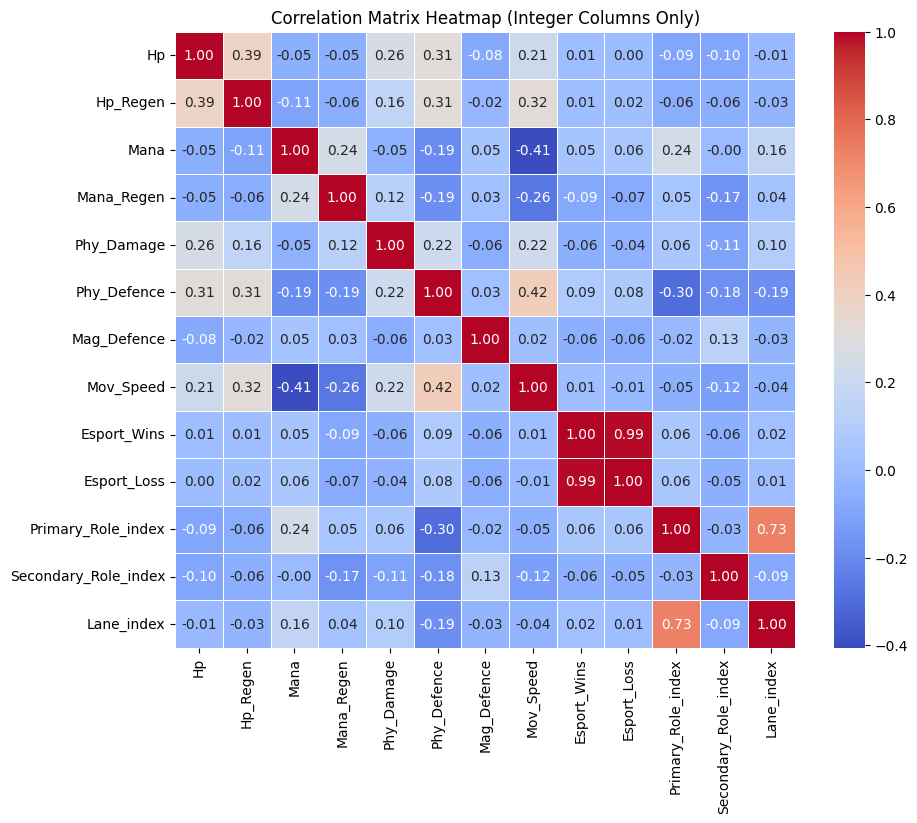

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.sql.functions import col
import seaborn as sns
import matplotlib.pyplot as plt

integer_columns = [col_name for col_name, col_type in df.dtypes if col_type in ['int','double']]

vector_assembler = VectorAssembler(inputCols=integer_columns, outputCol="features")

for c in integer_columns:
    median_value = df.approxQuantile(c, [0.5], 0.0)[0]
    df = df.na.fill(median_value, [c])

vector_assembler = VectorAssembler(inputCols=integer_columns, outputCol="features")

df_assembled = vector_assembler.transform(df).select("features")

matrix = Correlation.corr(df_assembled, "features").head()
correlation_matrix = matrix[0].toArray()

correlation_df = pd.DataFrame(correlation_matrix, columns=integer_columns, index=integer_columns)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap (Integer Columns Only)")
plt.show()

#Melakukan clustering dengan tujuan mengelompokkan hero

In [ ]:
# Pilih atribut yang akan digunakan untuk clustering
# selected_features = ["Esport_Wins", "Esport_Loss", "Hp", "Mana", "Hp_Regen","Phy_Damage", "Phy_Defence"]

# Coba jika fiturnya adalah "Esport_Wins", "Esport_Loss", "Lane_index", "Phy_Defence", "Mag_Defence"
# Coba "Esport_Wins", "Esport_Loss", "Mana", "Mana_Regen", "HP", "HP_Regen"
# Coba ...
selected_features2 = ["Esport_Wins", "Esport_Loss", "Lane_index", "Phy_Defence", "Mag_Defence"]

# Gabungkan atribut menjadi satu vektor
assembler = VectorAssembler(inputCols=selected_features2, outputCol="features")
data = assembler.transform(df)

In [ ]:
from pyspark.ml.clustering import KMeans

# Pilih jumlah cluster yang optimal
# kmeans = KMeans().setK(3).setSeed(1)

# Latih model K-means
kmeans = KMeans().setK(3).setSeed(1).setMaxIter(20)

model = kmeans.fit(data)

In [ ]:
# Prediksi cluster untuk setiap hero
predictions = model.transform(data)

# Tampilkan hasil clustering
predictions.select("Name","prediction").show()


+---------+----------+
|     Name|prediction|
+---------+----------+
|    Aamon|         1|
|     Akai|         2|
|   Aldous|         1|
|    Alice|         0|
|    Alpha|         1|
|  Alucard|         1|
|   Angela|         0|
|    Argus|         1|
|    Atlas|         0|
|   Aurora|         1|
|    Aulus|         1|
|   Badang|         1|
|  Balmond|         0|
|     Bane|         1|
|   Barats|         0|
|    Baxia|         0|
|  Beatrix|         2|
| Belerick|         1|
|Benedetta|         0|
|    Brody|         0|
+---------+----------+
only showing top 20 rows



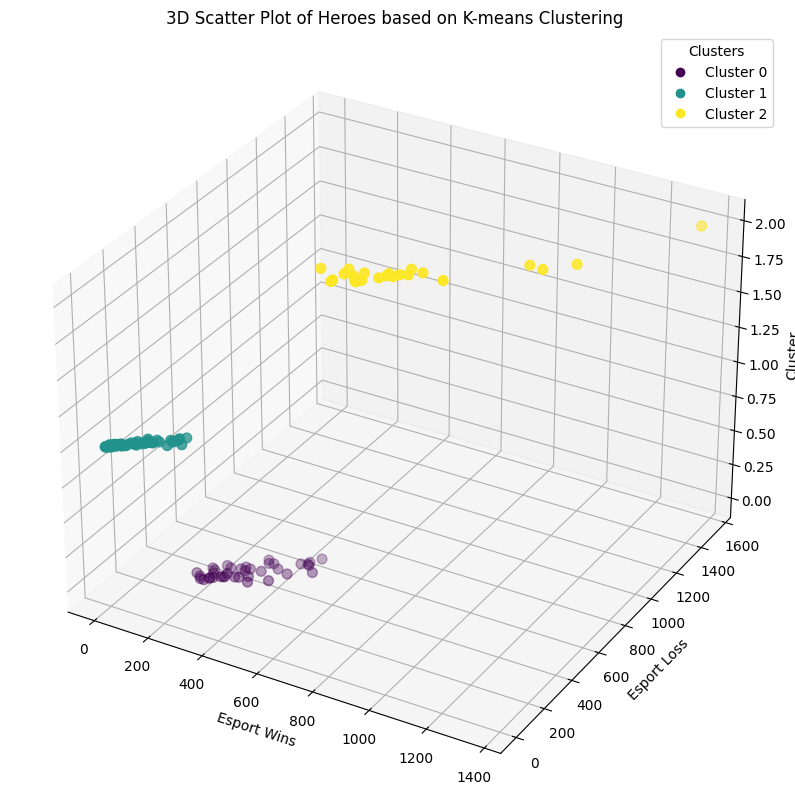

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Mengumpulkan hasil clustering ke dalam Pandas DataFrame
predictions_pd = predictions.select("Name", "Esport_Wins", "Esport_Loss", "prediction").toPandas()

# Membuat plot 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Menampilkan scatter plot 3D
scatter = ax.scatter(predictions_pd["Esport_Wins"], predictions_pd["Esport_Loss"], predictions_pd["prediction"], c=predictions_pd['prediction'], cmap='viridis', s=50)

# Menambahkan label sumbu
ax.set_xlabel('Esport Wins')
ax.set_ylabel('Esport Loss')
ax.set_zlabel('Cluster')

# Menambahkan legenda untuk cluster
legend_labels = [f'Cluster {i}' for i in range(model.getK())]
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters')

plt.title('3D Scatter Plot of Heroes based on K-means Clustering')
plt.show()


In [ ]:
from pyspark.sql.functions import col

# Menggabungkan DataFrame hasil clustering dengan DataFrame asli
joined_df = data.join(predictions, "Name")

# Menampilkan hasil clustering dengan nama hero, dan mengurutkannya berdasarkan klaster dan jumlah hero dalam klaster
sorted_cluster = joined_df.select("Name", "prediction").groupBy("Name", "prediction").count().orderBy(col("prediction").desc(), col("count").desc())

# Menampilkan hasil clustering yang sudah diurutkan
predictions.groupBy("prediction").count().show()
sorted_cluster.show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|   53|
|         2|   24|
|         0|   37|
+----------+-----+

+--------------+----------+-----+
|          Name|prediction|count|
+--------------+----------+-----+
|      Lancelot|         2|    1|
|          Ling|         2|    1|
|         Clint|         2|    1|
|Popol_and_Kupa|         2|    1|
|        Kagura|         2|    1|
|         Lunox|         2|    1|
|          Chou|         2|    1|
|      Cecilion|         2|    1|
|     Esmeralda|         2|    1|
|         Grock|         2|    1|
|        Thamuz|         2|    1|
|       Beatrix|         2|    1|
|          Ruby|         2|    1|
|           Yve|         2|    1|
|         Lylia|         2|    1|
|      Mathilda|         2|    1|
|        Khufra|         2|    1|
|       Paquito|         2|    1|
|          Akai|         2|    1|
|      Yu_Zhong|         2|    1|
+--------------+----------+-----+
only showing top 20 rows



#Tugas

Temukan nilai K terbaik bagi dataset ini, gunakan metode penentuan nilai K yang telah tersedia, paparkan hasilnya, dan jabarkan alasan akhirnya kelompok kalian memilih nilai tersebut.

### **Silhoutte Method**

In [ ]:
from pyspark import SparkFiles
from pyspark.sql import SparkSession

from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt
import pandas as pd

# Computing WSSSE for K values from 2 to 8
wssse_values =[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')

for i in range(2,8):
    KMeans_mod = KMeans(featuresCol='features', k=i)
    KMeans_fit = KMeans_mod.fit(data)
    output = KMeans_fit.transform(data)
    score = evaluator.evaluate(output)
    wssse_values.append(score)
    print('Silhouette Score for k =',i,'is',score)

Silhouette Score for k = 2 is 0.8073690111382439
Silhouette Score for k = 3 is 0.704384210131802
Silhouette Score for k = 4 is 0.7932949454820747
Silhouette Score for k = 5 is 0.7515511949940085
Silhouette Score for k = 6 is 0.7266206836951998
Silhouette Score for k = 7 is 0.7330257467931889


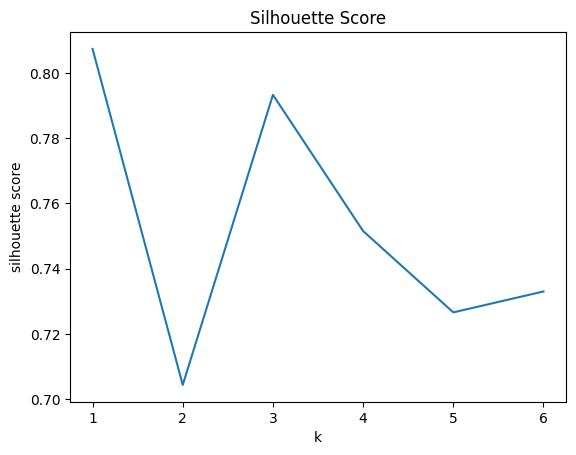

In [ ]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt

plt.plot(range(1,7),wssse_values)
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette Score')
plt.show()

Berdasarkan nilai Silhouette Score diatas, Score yang dihasilkan relatif tinggi, terutama untuk k = 2 dan k = 4, yang mengindikasikan bahwa konfigurasi cluster dengan jumlah tersebut mungkin merupakan pilihan yang baik. Namun untuk memilih nilai K yang optimal  harus mempertimbangkan faktor-faktor lain sehingga kita mencoba untuk menggunakan metode yang lainnya.

### **Elbow Method**

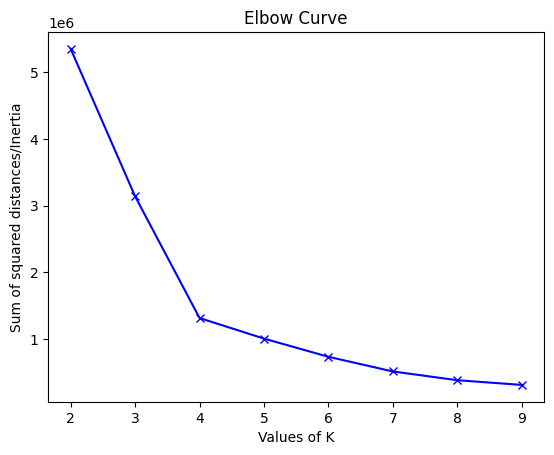

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for klass in K :
  kmeans = KMeans().setK(klass).setSeed(1).setMaxIter(20)
  model = kmeans.fit(data)
  Sum_of_squared_distances.append(model.summary.trainingCost)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Curve')
plt.show()

### Grafik menunjukkan pola yang menyerupai siku, di mana terjadi perubahan tajam pada k=4. Fenomena ini menandakan bahwa jumlah jarak kuadrat menurun secara signifikan, memberikan indikasi bahwa jumlah cluster optimal untuk dataset ini adalah 4. **Maka dari itu kelompok kami memilih metode elbow ini daripada Silhoutte karena lebih optimal.**

In [ ]:
from pyspark.ml.clustering import KMeans

# Pilih jumlah cluster yang optimal
# kmeans = KMeans().setK(4).setSeed(1)

# Latih model K-means
kmeans = KMeans().setK(4).setSeed(1).setMaxIter(20)

model = kmeans.fit(data)

In [ ]:
# Prediksi cluster untuk setiap hero
predictions = model.transform(data)

# Tampilkan hasil clustering
predictions.select("Name","prediction").show()


+---------+----------+
|     Name|prediction|
+---------+----------+
|    Aamon|         3|
|     Akai|         2|
|   Aldous|         3|
|    Alice|         0|
|    Alpha|         3|
|  Alucard|         3|
|   Angela|         0|
|    Argus|         3|
|    Atlas|         0|
|   Aurora|         3|
|    Aulus|         3|
|   Badang|         3|
|  Balmond|         0|
|     Bane|         3|
|   Barats|         0|
|    Baxia|         2|
|  Beatrix|         1|
| Belerick|         3|
|Benedetta|         2|
|    Brody|         2|
+---------+----------+
only showing top 20 rows



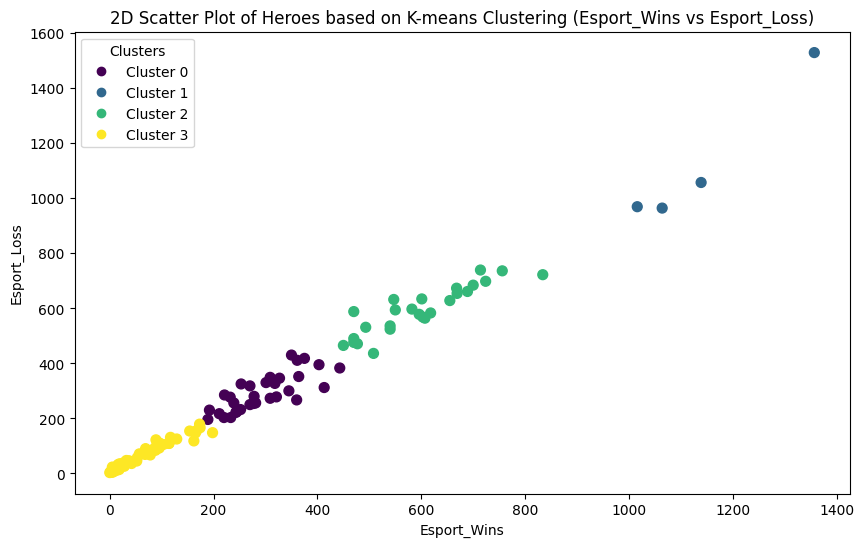

In [ ]:
import matplotlib.pyplot as plt

# Pilih dua fitur untuk plot 2D
feature1 = "Esport_Wins"
feature2 = "Esport_Loss"

# Membuat plot 2D
plt.figure(figsize=(10, 6))
scatter = plt.scatter(predictions_pd[feature1], predictions_pd[feature2], c=predictions_pd['prediction'], cmap='viridis', s=50)

# Menambahkan label sumbu
plt.xlabel(feature1)
plt.ylabel(feature2)

# Menambahkan legenda untuk cluster
legend_labels = [f'Cluster {i}' for i in range(model.getK())]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters')

plt.title(f'2D Scatter Plot of Heroes based on K-means Clustering ({feature1} vs {feature2})')
plt.show()


In [ ]:
from pyspark.sql.functions import col

# Menggabungkan DataFrame hasil clustering dengan DataFrame asli
joined_df = data.join(predictions, "Name")

# Menampilkan hasil clustering dengan nama hero, dan mengurutkannya berdasarkan klaster dan jumlah hero dalam klaster
sorted_cluster = joined_df.select("Name", "prediction").groupBy("Name", "prediction").count().orderBy(col("prediction").desc(), col("count").desc())

# Menampilkan hasil clustering yang sudah diurutkan
predictions.groupBy("prediction").count().show()
sorted_cluster.show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|    4|
|         3|   52|
|         2|   26|
|         0|   32|
+----------+-----+

+--------+----------+-----+
|    Name|prediction|count|
+--------+----------+-----+
|Minotaur|         3|    1|
| Melissa|         3|    1|
| Natalia|         3|    1|
|    Miya|         3|    1|
|  Eudora|         3|    1|
|Carmilla|         3|    1|
|Silvanna|         3|    1|
|   Hanzo|         3|    1|
|   Valir|         3|    1|
| Khaleed|         3|    1|
|  Martis|         3|    1|
|  Badang|         3|    1|
|  Aurora|         3|    1|
|  Odette|         3|    1|
|  Floryn|         3|    1|
|  Hanabi|         3|    1|
|   Bruno|         3|    1|
|   Freya|         3|    1|
|   Layla|         3|    1|
|  Zilong|         3|    1|
+--------+----------+-----+
only showing top 20 rows

